# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

### **Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### **Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

#### 1) Do the users spend more time on the new landing page than on the existing landing page?

#### 2) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### 3) Does the converted status depend on the preferred language?

#### 4) Is the time spent on the new page the same for the different language users?

### **Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* **user_id** - Unique user ID of the person visiting the website
* **group** - Whether the user belongs to the first group (control) or the second group (treatment)
* **landing_page** - Whether the landing page is new or old
* **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page
* **converted** - Whether the user gets converted to a subscriber of the news portal or not
* **language_preferred** - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [2]:
# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.7.3'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [4]:
# read the data
enews=pd.read_csv('/content/drive/MyDrive/Data Science/Business Statistics/E-news Express Project/abtest.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
df = enews.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [6]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [8]:
df.shape

(100, 6)

#### Observations: There are **100** rows and **6** columns in the dataset


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations: 

#### There are 3 datatypes in the different columns of the dataset: integer, float and string

#### One column is integer (**user_id**); one column is float(**time_spent_on_the_page**) and four columns are string(**group, landing_page, converted and language_preferred**)



#### Statistical summary of the dataset

In [10]:
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


#### Observations:

#### 1) There are 100 randomly selected users 

#### 2) Time spent on the landing page ranges from 0.19 minutes to 10.71 minutes

#### 3) Average time spent on page is 5.37 minutes. 

#### 4) Average time ~ median time (5.41 minutes) spent on page suggesting distribution is likely normally distributed

#### 5) Control and treatment groups who view the old and the new landing page respectively are split equally with 50% of users in each category which is by design

#### 6) Spanish is the most commonly preferred language preferred by 34% of the total population

#### 7) 54% of the randomly selected users have been converted to a subscriber

#### Check missing values in the dataset

In [11]:
df.isna().sum()  

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations: There are no missing values in the data

#### Check for duplicates in the dataset

In [12]:
df.duplicated().sum()

0

#### Observations: There are no duplicates in the dataset

### Univariate Analysis

### **Group**

In [13]:
# Percentages of users in each group 

df['group'].value_counts(normalize = True)

control      0.5
treatment    0.5
Name: group, dtype: float64

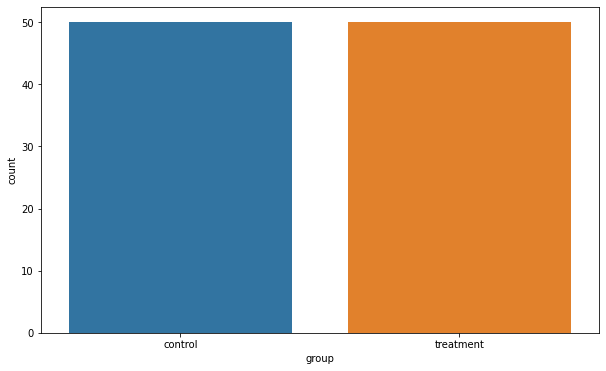

In [14]:
# Countplot showing the distribution of users in each group
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='group');

#### Observations:

#### There are 50% of users in the control group and 50% of users in the treatment group by design

### **Landing Page**

In [15]:
# Percentages of users served the old landing page vs the new landing page

df['landing_page'].value_counts(normalize = True)

old    0.5
new    0.5
Name: landing_page, dtype: float64

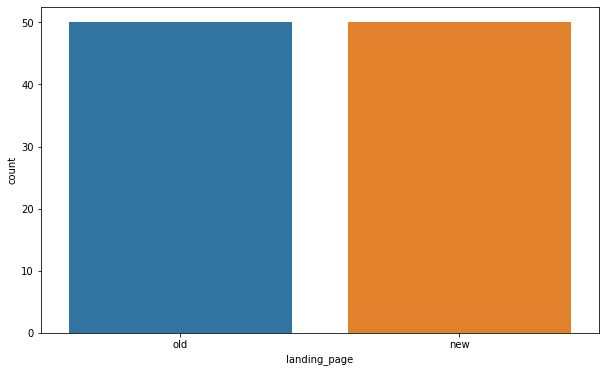

In [16]:
# Countplot showing the distribution of users served the old vs new landing page
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='landing_page');

#### Observations:

#### There are 50% of users served the old landing page and 50% of users served new landing page by design

### **Converted**

In [17]:
# Percentages of users either converted or not converted to a subscriber

df['converted'].value_counts(normalize = True)

yes    0.54
no     0.46
Name: converted, dtype: float64

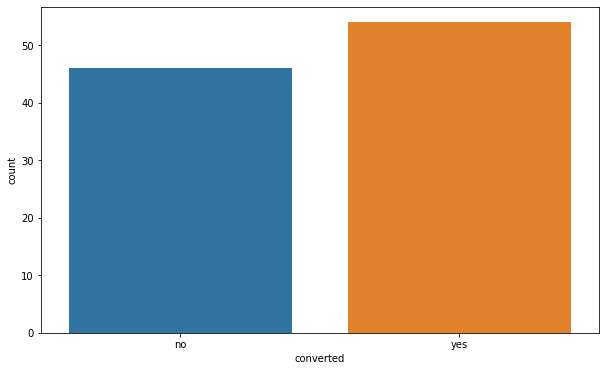

In [18]:
# Countplot showing the distribution of users either converted or not converted to a subscriber

plt.figure(figsize = (10,6))
sns.countplot(data=df,x='converted');

#### Observations: 

#### 54% of the randomly selected 100 users were converted to a subscriber while 46% remained unsubscribed

### **Language**

In [19]:
# First it is good to check which languages are preferred by customers

df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

In [20]:
# Percentages of users that prefer each langauge

df['language_preferred'].value_counts(normalize = True)

Spanish    0.34
French     0.34
English    0.32
Name: language_preferred, dtype: float64

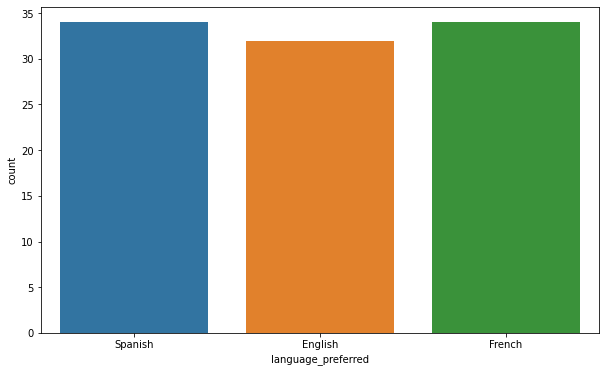

In [21]:
# Countplot showing the distribution for various language preferences by users
plt.figure(figsize = (10,6))
sns.countplot(data=df,x='language_preferred');

#### Observations: 

#### 1) Three languages are preferred amongst these randomly selected 100 users: Spanish, English and French

#### 2) Each language seems to be preferred by roughly the same proportion amongst these 100 users: 34% prefer Spanish, 34% prefer French and 32% prefer English

### **Time spent on Landing page**

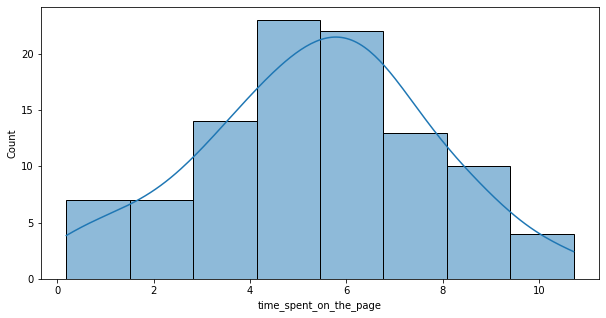

In [22]:
# Histogram showing the distribution of time spent on landing page

plt.figure(figsize = (10,5))
sns.histplot(data=df,x='time_spent_on_the_page',kde=True);

Sample mean = 5.378 minutes


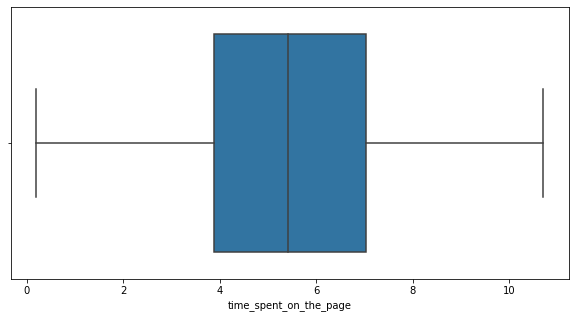

In [23]:
# Box-plot showing the distribution of of time spent on landing page
plt.figure(figsize = (10,5))
sns.boxplot(data=df,x='time_spent_on_the_page')
print('Sample mean =',round(df['time_spent_on_the_page'].mean(),3),"minutes")
plt.show()

#### Observations: 

#### 1) Distribution of time spent on landing page looks approximately normally distributed

#### 2) Sample mean is 5.38 minutes

### Bivariate Analysis

### **Time spent on each landing page [Old vs New]**

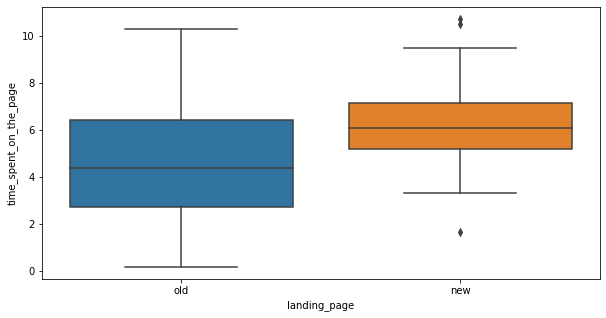

In [24]:
# Boxplot showing time spent on old vs new landing page by the users
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');

#### Observations: 

#### Users viewing the **NEW** landing page seems to spending more time on the landing page compared to users viewing the **OLD** landing page.

#### We will be exploring in detail with a statistical test to show if indeed users are spending more time on the new landing page compared to the old landing page

### **Time spent on Landing page for converted vs not converted users**

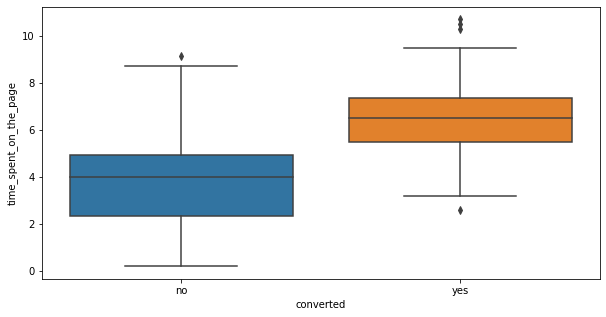

In [25]:
# Boxplot showing time spent on landing page for converted vs not converted users
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page');

#### Observations: Users subscribing to the e-news express seem to spending a few minutes more on the landing page compared to users who have not subscribed

### **Time spent on Landing page between users preferring different languages**

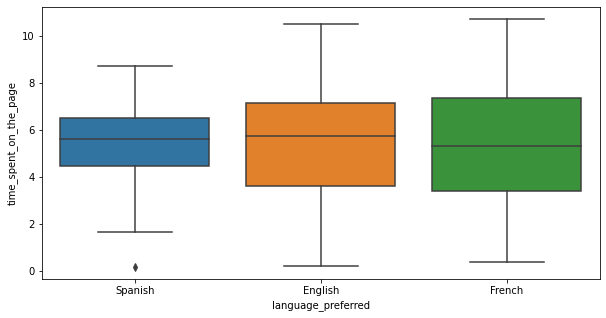

In [26]:
# Boxplot showing time spent on landing page for users preferring different languages
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page');

#### Observations: There does not seem a systematic difference in the time spent on the landing page between users preferring different languages


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

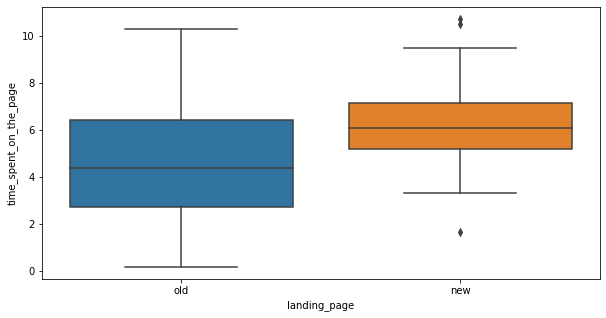

In [27]:
# Boxplot showing time spent on old vs new landing page
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page');

#### Observations: There seems to be visual evidence supporting the notion that users spend more time on the new landing page compared to the old landing page. Let's explore this further

### Step 1: Define the null and alternate hypotheses

#### Let $\mu_1, \mu_2$ be the mean times spent by users on the **new** and **old** landing pages respectively

#### We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

#### against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

#### This is the case of a one-tailed test for comparing the equality of two means from two independent populations. As the population standard deviations are unknown, we can perform a **2 independent sample T-test for equality of means** 

#### Are T-test assumptions satisfied in this case?

#### (1) Continuous data - Yes, time spent on the landing page is measured on a continous scale.
#### (2) Normally distributed populations - Yes. 
#### (3) Independent populations - As users for the two groups are randomly selected, the samples are from two independent populations

#### (4) Unequal population standard deviations - We will show that the sample standard deviations are different. We can thus assume the population standard deviations are different as well.
#### (5) Random sampling - Yes, we have randomly selected users for the survey

#### Therefore, t-test assumptions are valid.


### Step 3: Decide the significance level

#### Here we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [28]:
# Dataframe to store only data for users visiting the new landing page

df1=df[df['landing_page']=='new']

# Dataframe to store only data for users visiting the old landing page

df2=df[df['landing_page']=='old']

In [29]:
# Sample means and sample standard deviations for users visiting new and old landing pages

print('Average time spent in new landing page ' + str(round(df1['time_spent_on_the_page'].mean(),2)),'minutes')

print('Average time spent in old landing page ' + str(round(df2['time_spent_on_the_page'].mean(),2)),'minutes')


print('The standard deviation for time spent on new landing page is ' + str(round(df1['time_spent_on_the_page'].std(), 2)),'minutes')

print('The standard deviation for time spent on old landing page is ' + str(round(df2['time_spent_on_the_page'].std(), 2)),'minutes')

Average time spent in new landing page 6.22 minutes
Average time spent in old landing page 4.53 minutes
The standard deviation for time spent on new landing page is 1.82 minutes
The standard deviation for time spent on old landing page is 2.58 minutes


#### We have split the user data visiting the new landing page and the old landing page into two dataframes. 

#### Because the sample standard deviations are unequal, we can assume that the population standard deviations to also be unequal.

### Step 5: Calculate the p-value

In [30]:
from scipy.stats import ttest_ind

#Perform 2 independent sample t-test for unequal variance where the alternative is greater
test_stat,p_value1 = ttest_ind(df1['time_spent_on_the_page'], df2['time_spent_on_the_page'], equal_var=False, alternative='greater')

#Round pvalue to 4 significant figures
p_value=round(p_value1,4)

print("The test statistic is ", round(test_stat,3), "and the p-value is ", p_value)

The test statistic is  3.787 and the p-value is  0.0001


### Step 6: Compare the p-value with $\alpha$

In [31]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

#### Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the time spent by users on the **new landing page** is indeed **greater** than the time spent by users on the **old landing page**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

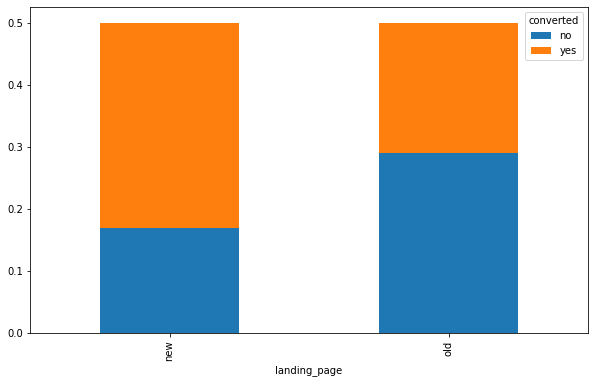

In [32]:
# visual analysis
pd.crosstab(df['landing_page'],df['converted'],normalize=True).plot(kind='bar',stacked=True,figsize=((10,6)));

#### Observations: 

#### Proportions of users becoming subscribers is greater for users viewing the new landing page compared to the old landing page

#### Thus, conversion rate for the new landing page seems to be better than the conversion rate for the old landing page

#### We will need to evaulate if this apparent difference is indeed statistically significant

### Step 1: Define the null and alternate hypotheses

#### Conversion rate = Proportion of users who visit a certain landing page (New/Old) and get converted to a subscriber

**$H_0:$ The conversion rate for NEW landing page is equal to the conversion rate for the OLD landing page.**

**$H_a:$ The conversion rate for NEW landing page is greater than the conversion rate for OLD landing page**

#### In other words, if $p_n$ and $p_o$ are the conversion rates for the new and old pages respectively 

#### We will test the null hypothesis

>$H_0:p_n =p_o$

#### against the alternate hypothesis

>$H_a:p_n > p_o$

### Step 2: Select Appropriate test



#### The formulated hypotheses are concerned with proportions. We can perform a **one-tailed test of 2 proportion Z-test** to analyse the hypotheses and draw a conclusion. 


#### Let's test whether the Z-test assumptions are satisfied 

#### (1)  Binomally distributed population - Yes, an user is either converted or not converted to subscriber.
#### (2) Random sampling from the population - Yes, users are randomly selected for this survey
#### (3) Can the binomial distribution be approximated to normal distribution? - Yes. For binary data, Central Limit theorem works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$np_n = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_n) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_o = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_o) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


#### NOTE: Please see step 4 for the data used in the calculations above

### Step 3: Decide the significance level

#### Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [33]:
# converted subscribers after watching NEW landing page
new_sub = df[df['landing_page']=='new'].converted.value_counts()['yes']

# # converted subscribers after watching OLD landing page
old_sub = df[df['landing_page']=='old'].converted.value_counts()['yes']

print('The number of people converted to subscribers after visiting new and old landing page are {0} and {1} respectively'.format(new_sub,old_sub))

# number of users who watched new landing page
new_users = df.landing_page.value_counts()['new']

# number of males in the data
old_users = df.landing_page.value_counts()['old']

print('The total number of users watching new and old landing pages are {0} and {1} respectively'.format(new_users, old_users))

The number of people converted to subscribers after visiting new and old landing page are 33 and 21 respectively
The total number of users watching new and old landing pages are 50 and 50 respectively


In [34]:
print(f' The conversion rates for new and old landing pages respectively are {round((new_sub/new_users),2)}, {round((old_sub/old_users),2)} respectively')


 The conversion rates for new and old landing pages respectively are 0.66, 0.42 respectively


#### Observations:

(1) 66% of users are converted to subscriber after visiting the New Landing page

(2) 42% of users are converted to subscriber after visiting the Old Landing page

### Step 5: Calculate the p-value

In [35]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, p_value2 = proportions_ztest([new_sub, old_sub] , [new_users, old_users], alternative = 'larger')

#Round pvalue to 4 significant figures
p_value=round(p_value2,4)

# print the p-value
print('The p-value is '+ str(p_value))

The p-value is 0.008


### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

#### Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for users seeing the **new landing page** is **greater** than the conversion rate for  users seeing the **old landing page**

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [37]:
# create a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(df.language_preferred,df.converted,margins=True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


#### Observations:

(1) There are a total of 100 randomly selected users who were surveyed

(2) Of the 100 users, 32% prefer English , 34% prefer French and 34% prefer Spanish- each language preference is roughly in the same proportion in this survey

(3) Nearly 66% of users who prefer English have converted to subscriber 

(4) About 53% of users who prefer Spanish have converted to subscriber

(5) Only 44% of users who prefer French have converted to subscriber

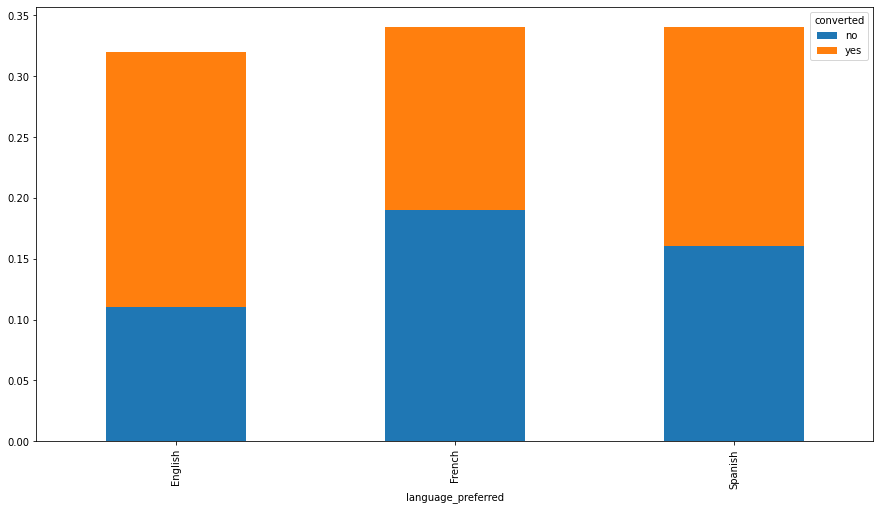

In [38]:
# visual analysis
pd.crosstab(df['language_preferred'],df['converted'],normalize=True).plot(kind='bar',stacked=True,figsize=((15,8)));

#### Observations:

#### The proportion of users who have converted to subcriber is higher in the group who prefer English as a language

#### Based on sample data, we can infer that proportion of users converting to subscriber is highest amongst users who prefer English as a language. We cannot say if this difference is statistically significant enough to say that conversion to subscriber is dependent on preferred language

### Step 1: Define the null and alternate hypotheses

#### We will test the null hypothesis

>$H_0:$ User language preference and conversion to subscriber status are independent of each other

#### against the alternate hypothesis

>$H_a:$ User language preference and conversion to subscriber status are dependent on each other

### Step 2: Select Appropriate test


#### The formulated hypotheses can be tested using a **Chi-square test of independence** of attributes, concerning the two categorical variables, language of preference (Spanish/English/French) and conversion status (yes/no)

#### Are assumptions to perform the Chi-square test of independence satisfied ?

#### (1) Categorical variables - Yes
#### (2) Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
#### (3) Random sampling from the population - Yes

### Step 3: Decide the significance level

#### Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [39]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [40]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value3, dof, expected = chi2_contingency(contingency_table)

#Round pvalue to 4 significant figures
p_value=round(p_value3,4)

print("Test Statistic =",round(chi,4))
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.093
p-value = 0.213
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [41]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.213 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

#### At the 5% level of significance, we fail to reject the null hypothesis that user language preference and conversion to subcriber status are independent of each other 

#### Hence, we **do not have enough statistical evidence** to say that **user's conversion to subscriber is dependent on language preferred by user**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [42]:
# Examine data only for users viewing the new page

df_new =df[df['landing_page']=='new']

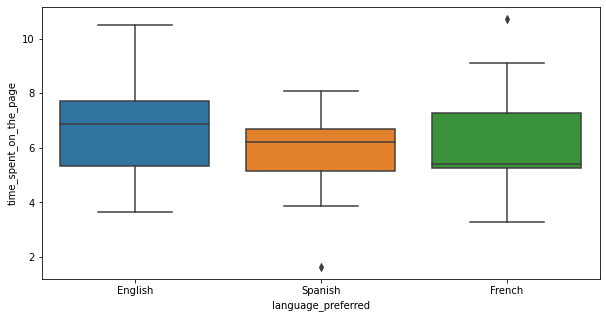

In [43]:
# Boxplot showing time spent on the new page for users preferring different languages
plt.figure(figsize = (10,5))
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page');

#### Observations: There does not seem to exist large systematic differences between the time spent on the NEW landing page for users preferring different languages

#### Users preferring English seem to spend longer median times on the new page compared to Spanish and French users and also seem have a wider range in the time spent on the new page

#### Users preferring Spanish generally seem to spend a narrower range of time in the new page between 4 and 8 minutes but has 1 outlier on the lower side

#### We will have to test if the similarities or differences in the time spent on the new page between the users preferring different languages is statistically significant

### Step 1: Define the null and alternate hypotheses

#### We want to test the null hypotheses

> $H_0:$ The average time spent on the new page is equal for different language users (English/French/Spanish) <br>

#### against the alternate hypotheses

> $H_a:$ At least one of the average time spent on the new page is different for different language users (English/French/Spanish)

#### Let $\mu_1, \mu_2$ and $\mu_3$ be the average time spent on the new page for users preferring English, French and Spanish respectively

#### Mathematically, the above formulated hypotheses can be written as:

#### We want to test the null hypotheses

>$H_0: \mu_1 = \mu_2 = \mu_3$ <br>

#### against the alternate hypotheses

>$H_a:$ At least one of the average time spent on the new page is different for different language users

### Step 2: Select Appropriate test


#### The formulated hypotheses can be tested using  a **ONE WAY ANOVA TEST**

#### However before we proceed, we have to check the assumptions about the normality and equality of variance are valid. 

#### For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

#### For equality of variance, Levene test is applied to the response variable.


### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ average time spent on the new page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ average time spent on the new page does not follow normal distribution

In [44]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_val = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', round(p_val,4))

The p-value is 0.804


#### Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [45]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_val2 = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"])
# find the p-value
print('The p-value is', round(p_val2,4))

The p-value is 0.4671


#### Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

#### Let's check whether the assumptions are satisfied to perform One way Anova test

#### (1) The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
#### (2) Samples are independent simple random samples - Yes
#### (3) Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

#### We can perform one way Anova test

### Step 3: Decide the significance level

#### Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [46]:
# create separate variables to store the time spent on new page with respect to users preferring English, Spanish and French as language
english_prefer = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
spanish_prefer = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
french_prefer = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [47]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value4 = f_oneway(english_prefer,spanish_prefer,french_prefer)

#Round pvalue to 4 significant figures
p_value=round(p_value4,4)

print('The p-value is ', p_value)

The p-value is  0.432


### Step 6: Compare the p-value with $\alpha$

In [48]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.432 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

#### As the p-value is greater than the significance level, we fail to reject the null hypothesis. 

#### Hence, we **do not have enough statistical significance** to conclude that the **average time spent on the new landing page is different for users with different language preferences** at the 5% significance level.

## **Conclusion and Business Recommendations**

### (1) Users spend an average time of 6.2 minutes on the **NEW** Landing page. In contrast, users spend an average time of 4.5 minutes on the **OLD** Landing Page

### (2) There is enough statistical evidence to support that users spend greater time on the **NEW** landing page compared to the **OLD** landing page

### (3) Conversion rate to subscriber for users viewing the **NEW** landing page is 66%. Conversion rate for users viewing the **OLD** landing page is 42%

### (4) There is enough statistical evidence to also support that conversion rate for users viewing the **NEW** landing page is higher than conversion rate for users viewing the **OLD** landing page

### (5) Therefore, we recommend the e-news express service to adopt the **NEW** landing page as the de-facto landing page as it could help boost

#### (A) User engagement (users spend longer duration on the landing page) which could ultimately lead to greater ad-clicks and higher ad-revenue 

#### (B) User conversion rate to subscriber status (Longer user engagaments often leads to higher conversion rates which would generate greater revenue for the e-news service)

### (6) New landing page can be used in future marketing campaigns designed towards attracting more users to the e-news service.

### (7) Conversion rate for users preferring English is higher (66%) than the other two languages

### (8) However, there is not enough statistical evidence at the time with the current dataset to support that conversion to subscriber status is dependent on user language preference. Larger sample sizes in future surveys may be required to demonstrate if such a relationship might exist.

### (9) There is also not enough statistical evidence to support that the average time spent on the New landing page is different for users with different language preferences. 

## **Additional Comments/Recommendations**

### (1) E-news express can run direct unobtrusive surveys to users to ask what they liked about the new Landing page and what kind of content they prefer to see etc. This can help design newer landing pages that improve user engagement and conversions. 

### (2) It seemed users preferring English were converted to subscribers in slightly larger proportions compared to French/Spanish. Although it was statistically inconclusive that language preference had an effect on conversion rates, surveys can help identify what content Spanish/French users prefer to see and boost the conversion rates for Spanish/French language preferred users.

### (3) E-news can also examine other metrics outside of time spent on landing page. Other metrics such as no of website visits in a day, cumulative time spent by user in the website etc may guide useful user behavior that can be captured to improve user engagement and conversion rates

___